In [ ]:
import sympy as sp

x = sp.symbols('x')
f = x**3 + 2*x**2 + x + 1
f_prime = sp.diff(f, x)
print(f_prime)

3*x**2 + 4*x + 1


In [ ]:
import scipy.integrate as spi
import numpy as np

f = lambda x: x**2
result, error = spi.quad(f, 0, 1)
print(result)

0.33333333333333337


[2.55936849 1.29374022]


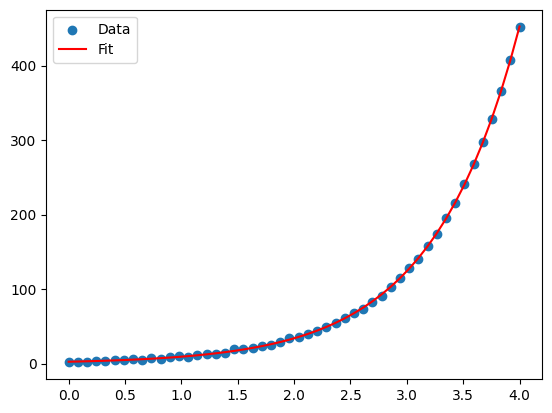

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the model function
def model(x, a, b):
    return a * np.exp(b * x)

# Generate some data
xdata = np.linspace(0, 4, 50)
ydata = model(xdata, 2.5, 1.3) + np.random.normal(size=len(xdata))

# Fit the model to the data
popt, pcov = curve_fit(model, xdata, ydata)
print(popt)

# Plot the data and the fit
plt.scatter(xdata, ydata, label='Data')
plt.plot(xdata, model(xdata, *popt), label='Fit', color='red')
plt.legend()
plt.show()

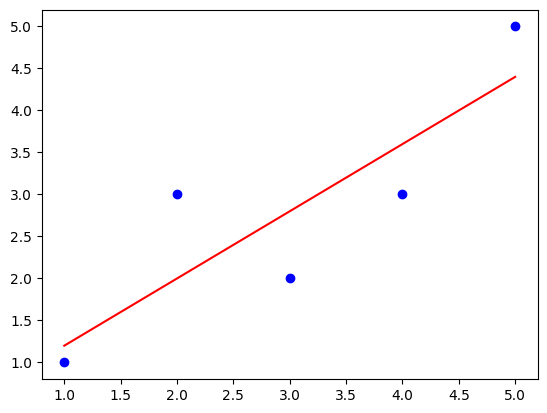

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate some data
x = np.array([1, 2, 3, 4, 5]).reshape((-1, 1))
y = np.array([1, 3, 2, 3, 5])

# Create and fit the model
model = LinearRegression().fit(x, y)

# Predict
y_pred = model.predict(x)

# Plot the data and the regression line
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.show()

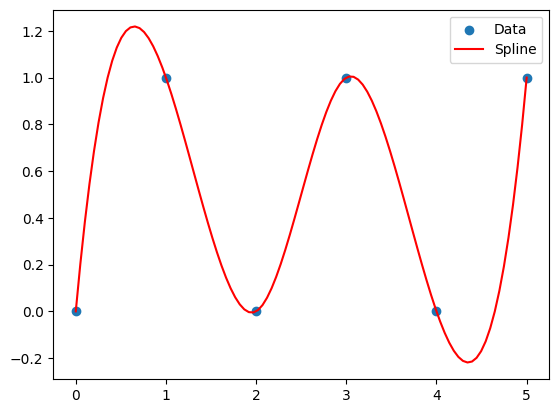

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Generate some data
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 0, 1, 0, 1])

# Create the spline
cs = CubicSpline(x, y)

# Evaluate the spline
x_new = np.linspace(0, 5, 100)
y_new = cs(x_new)

# Plot the data and the spline
plt.scatter(x, y, label='Data')
plt.plot(x_new, y_new, label='Spline', color='red')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from scipy.interpolate import interp1d

# Define the data points
x = np.array([2.00, 4.25, 5.25, 7.81, 9.20, 10.60])
y = np.array([7.2, 7.1, 6.0, 5.0, 3.5, 5.0])

# Create the linear interpolation function
linear_interp = interp1d(x, y, kind='linear')

# Calculate the value of y at x = 4.0
x_new = 4.0
y_new = linear_interp(x_new)
print(f"The value of y at x = {x_new} is {y_new}")

The value of y at x = 4.0 is 7.111111111111111


In [ ]:
import numpy as np

# Define the function to integrate
def f(x):
    return x**2  # Example function

# Implement the trapezoidal rule
def trapezoidal_rule(a, b, n):
    h = (b - a) / n
    integral = (f(a) + f(b)) / 2.0
    for i in range(1, n):
        integral += f(a + i * h)
    integral *= h
    return integral

# Define the integration limits and number of subintervals
a = 0  # Lower limit
b = 1  # Upper limit
n = 100  # Number of subintervals

# Calculate the integral
result = trapezoidal_rule(a, b, n)
print(f"The integral of f(x) from {a} to {b} is approximately {result}")

The integral of f(x) from 0 to 1 is approximately 0.33335000000000004


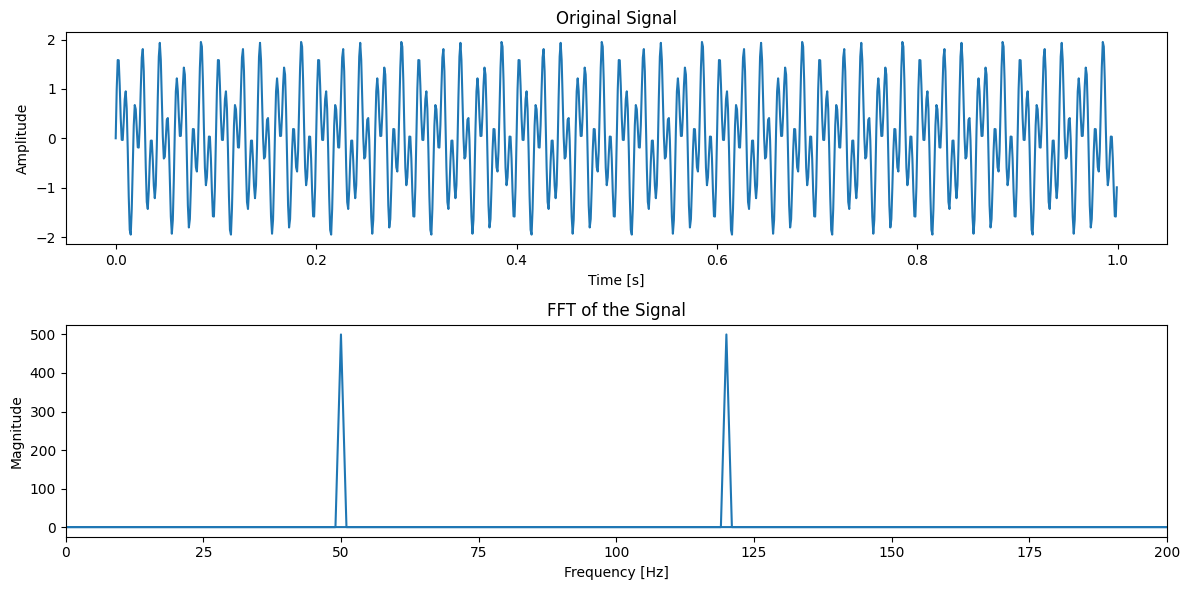

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
f1 = 50  # Frequency of the first sine wave
f2 = 120  # Frequency of the second sine wave
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector

# Define the signal
s = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Compute the FFT
fft_s = np.fft.fft(s)
fft_freq = np.fft.fftfreq(len(s), 1/fs)

# Plot the original signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, s)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the FFT
plt.subplot(2, 1, 2)
plt.plot(fft_freq, np.abs(fft_s))
plt.title('FFT of the Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 200)  # Limit x-axis for better visualization
plt.tight_layout()
plt.show()

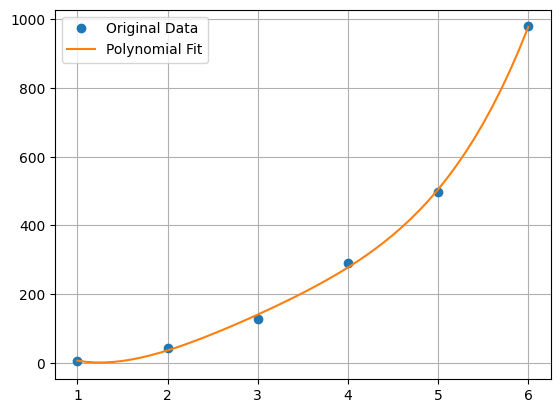

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data points
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([5.5, 43.1, 128, 290.7, 498.4, 978.67])

# Fit a 4th-degree polynomial to the data
p = np.polyfit(x, y, 4)

# Define new x-values for evaluation
x2 = np.arange(1, 6.1, 0.1)

# Evaluate the polynomial at the new x-values
y2 = np.polyval(p, x2)

# Plot the original data and the polynomial fit
plt.plot(x, y, 'o', label='Original Data')
plt.plot(x2, y2, label='Polynomial Fit')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import numpy as np

def lagrange_interpolation(x, y):
    def L(k, x_new):
        term = [(x_new - xj) / (x[k] - xj) for j, xj in enumerate(x) if j != k]
        return np.prod(term, axis=0)

    def P(x_new):
        return sum(yk * L(k, x_new) for k, yk in enumerate(y))

    return P

# Given data points
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])

# Create the Lagrange interpolation function
P = lagrange_interpolation(x, y)

# Evaluate the polynomial at new points
x_new = np.linspace(1, 4, 100)
y_new = P(x_new)

print("Lagrange interpolation values:", y_new)

Lagrange interpolation values: [ 1.          1.06152433  1.12488522  1.19008264  1.25711662  1.32598714
  1.39669421  1.46923783  1.543618    1.61983471  1.69788797  1.77777778
  1.85950413  1.94306703  2.02846648  2.11570248  2.20477502  2.29568411
  2.38842975  2.48301194  2.57943067  2.67768595  2.77777778  2.87970615
  2.98347107  3.08907254  3.19651056  3.30578512  3.41689624  3.52984389
  3.6446281   3.76124885  3.87970615  4.          4.12213039  4.24609734
  4.37190083  4.49954086  4.62901745  4.76033058  4.89348026  5.02846648
  5.16528926  5.30394858  5.44444444  5.58677686  5.73094582  5.87695133
  6.02479339  6.17447199  6.32598714  6.47933884  6.63452709  6.79155188
  6.95041322  7.11111111  7.27364555  7.43801653  7.60422406  7.77226814
  7.94214876  8.11386593  8.28741965  8.46280992  8.64003673  8.81910009
  9.          9.18273646  9.36730946  9.55371901  9.74196511  9.93204775
 10.12396694 10.31772268 10.51331497 10.7107438  10.91000918 11.11111111
 11.31404959 11.5188

In [ ]:
import numpy as np

def newtons_divided_difference(x, y):
    n = len(x)
    # Create a 2D array to store the divided differences
    divided_diff = np.zeros((n, n))
    divided_diff[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            divided_diff[i, j] = (divided_diff[i + 1, j - 1] - divided_diff[i, j - 1]) / (x[i + j] - x[i])

    # The coefficients of the polynomial are the first row of the divided differences table
    coefficients = divided_diff[0, :]
    return coefficients

x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])
coefficients = newtons_divided_difference(x, y)
print("Newton's coefficients:", coefficients)

Newton's coefficients: [1. 3. 1. 0.]


In [ ]:
import numpy as np

def power_iteration(A, num_simulations: int):
    # Choose a random vector to start with
    b_k = np.random.rand(A.shape[1])

    for _ in range(num_simulations):
        # Calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)

        # Calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)

        # Re normalize the vector
        b_k = b_k1 / b_k1_norm

    # Eigenvalue
    eigenvalue = np.dot(b_k.T, np.dot(A, b_k)) / np.dot(b_k.T, b_k)

    return eigenvalue, b_k

# Given matrix
A = np.array([[4, 1, -1],
              [1, 3, 1],
              [-1, 1, 2]])

# Compute the largest eigenvalue and corresponding eigenvector
eigenvalue, eigenvector = power_iteration(A, 1000)
print("Eigenvalue:", eigenvalue)
print("Eigenvector:", eigenvector)

Eigenvalue: 4.675130870566646
Eigenvector: [ 0.88765034  0.42713229 -0.17214786]


In [ ]:
import numpy as np

def qr_algorithm(A, num_iterations: int):
    n = A.shape[0]
    Q = np.eye(n)
    R = A.copy()

    for _ in range(num_iterations):
        Q_i, R_i = np.linalg.qr(R)
        R = np.dot(R_i, Q_i)
        Q = np.dot(Q, Q_i)

    eigenvalues = np.diag(R)
    eigenvectors = Q

    return eigenvalues, eigenvectors

# Given matrix
A = np.array([[4, 1, -1],
              [1, 3, 1],
              [-1, 1, 2]])

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = qr_algorithm(A, 1000)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: [4.67513087 3.53918887 0.78568026]
Eigenvectors: [[ 0.88765034 -0.23319198  0.39711255]
 [ 0.42713229  0.73923874 -0.52065737]
 [-0.17214786  0.63178128  0.75578934]]
